In [1]:
import sys
!{sys.executable} -m pip install spotipy

In [2]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd 
import math

In [3]:
sp = spotipy.Spotify()

USER_ID = "emilyrlandman"
PLAYLIST_ID = "6yGi7t09eshTWhm00CRo9Y"
CLIENT_ID = "27a2df6fdb064b40b952dbe55f451421" 
CLIENT_SECRET = "a97bf4bf619b4239961eb80513e2c0e0" 
CLIENT_CREDENTIALS = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 

sp = spotipy.Spotify(client_credentials_manager=CLIENT_CREDENTIALS) 
sp.trace=False


In [18]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
full_df = pd.DataFrame()
for i in range(iterations):
    playlist = sp.user_playlist_tracks(USER_ID, PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
    ids = []
    for j in range(len(songs)): 
        ids.append(songs[j]["track"]["id"])
    features = sp.audio_features(ids)
    df = pd.DataFrame(features)
    full_df = full_df.append(df, ignore_index=True)
    
full_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.668,0.739,4,-4.919,1,0.0308,0.0383,0.000000,0.1300,0.571,131.918,audio_features,6Vecwo7AHst9V2CE3kmwr0,spotify:track:6Vecwo7AHst9V2CE3kmwr0,https://api.spotify.com/v1/tracks/6Vecwo7AHst9...,https://api.spotify.com/v1/audio-analysis/6Vec...,231467,4
1,0.608,0.639,7,-7.205,1,0.0246,0.0208,0.000059,0.0893,0.369,96.915,audio_features,1c7UYTut2SBOPq64o2t0uN,spotify:track:1c7UYTut2SBOPq64o2t0uN,https://api.spotify.com/v1/tracks/1c7UYTut2SBO...,https://api.spotify.com/v1/audio-analysis/1c7U...,268973,4
2,0.608,0.603,2,-6.792,1,0.0271,0.0143,0.000012,0.0833,0.490,88.824,audio_features,3jFP1e8IUpD9QbltEI1Hcg,spotify:track:3jFP1e8IUpD9QbltEI1Hcg,https://api.spotify.com/v1/tracks/3jFP1e8IUpD9...,https://api.spotify.com/v1/audio-analysis/3jFP...,223960,4
3,0.647,0.729,5,-6.251,1,0.0236,0.0206,0.048900,0.1340,0.687,94.010,audio_features,7vFv0yFGMJW3qVXbAd9BK9,spotify:track:7vFv0yFGMJW3qVXbAd9BK9,https://api.spotify.com/v1/tracks/7vFv0yFGMJW3...,https://api.spotify.com/v1/audio-analysis/7vFv...,249627,4
4,0.699,0.770,5,-7.658,0,0.0360,0.0181,0.000138,0.0644,0.589,101.984,audio_features,7Kohy4v3KLWfUXlv9N3feB,spotify:track:7Kohy4v3KLWfUXlv9N3feB,https://api.spotify.com/v1/tracks/7Kohy4v3KLWf...,https://api.spotify.com/v1/audio-analysis/7Koh...,262107,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.641,0.579,9,-8.276,1,0.0896,0.4790,0.000096,0.2140,0.421,145.995,audio_features,6y4pOReFqH2wzo4CV91cZC,spotify:track:6y4pOReFqH2wzo4CV91cZC,https://api.spotify.com/v1/tracks/6y4pOReFqH2w...,https://api.spotify.com/v1/audio-analysis/6y4p...,212428,4
526,0.651,0.718,0,-3.924,1,0.3020,0.2270,0.000000,0.1090,0.402,116.772,audio_features,7cG6SxmQ24hQWnR8UThrk2,spotify:track:7cG6SxmQ24hQWnR8UThrk2,https://api.spotify.com/v1/tracks/7cG6SxmQ24hQ...,https://api.spotify.com/v1/audio-analysis/7cG6...,207187,4
527,0.746,0.644,7,-2.605,1,0.2320,0.4000,0.000000,0.0950,0.542,146.187,audio_features,4E3qImtJzRqLt8ZZyLceOE,spotify:track:4E3qImtJzRqLt8ZZyLceOE,https://api.spotify.com/v1/tracks/4E3qImtJzRqL...,https://api.spotify.com/v1/audio-analysis/4E3q...,249751,4
528,0.677,0.665,5,-6.949,1,0.4870,0.3370,0.000000,0.1150,0.522,87.637,audio_features,68lOQPb5tX8U2cQRuas0L2,spotify:track:68lOQPb5tX8U2cQRuas0L2,https://api.spotify.com/v1/tracks/68lOQPb5tX8U...,https://api.spotify.com/v1/audio-analysis/68lO...,240199,4


In [19]:
#INTERLUDE: remove 7 second song and add 1s and 0s

final_df = full_df.drop([81])

col = [1] * 81
zeroes = [0] * (529-81)

col.extend(zeroes)

final_df["Yes"]=col

final_df.drop(['type', 'id','uri','track_href','analysis_url'], axis=1, inplace=True)

final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Yes
0,0.668,0.739,4,-4.919,1,0.0308,0.0383,0.000000,0.1300,0.571,131.918,231467,4,1
1,0.608,0.639,7,-7.205,1,0.0246,0.0208,0.000059,0.0893,0.369,96.915,268973,4,1
2,0.608,0.603,2,-6.792,1,0.0271,0.0143,0.000012,0.0833,0.490,88.824,223960,4,1
3,0.647,0.729,5,-6.251,1,0.0236,0.0206,0.048900,0.1340,0.687,94.010,249627,4,1
4,0.699,0.770,5,-7.658,0,0.0360,0.0181,0.000138,0.0644,0.589,101.984,262107,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.641,0.579,9,-8.276,1,0.0896,0.4790,0.000096,0.2140,0.421,145.995,212428,4,0
526,0.651,0.718,0,-3.924,1,0.3020,0.2270,0.000000,0.1090,0.402,116.772,207187,4,0
527,0.746,0.644,7,-2.605,1,0.2320,0.4000,0.000000,0.0950,0.542,146.187,249751,4,0
528,0.677,0.665,5,-6.949,1,0.4870,0.3370,0.000000,0.1150,0.522,87.637,240199,4,0


In [20]:
#Set up data

# Assign X (data) and y (target)
X = final_df.drop("Yes", axis=1)
y = final_df["Yes"]
print(X.shape, y.shape)

#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



(529, 13) (529,)


In [21]:
#Logistic Regression

#create model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

#train model
classifier.fit(X_train, y_train)

#test model
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Testing Data Score: 0.8120300751879699


In [23]:
#Decision Tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()

#train model
clf = clf.fit(X_train, y_train)

#test model
clf.score(X_test, y_test)

0.9172932330827067

In [25]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

#train model
rf = rf.fit(X_train, y_train)

#test model
print(rf.score(X_test, y_test))

feature_names = final_df.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

0.9699248120300752


[(0.40607919347100846, 'speechiness'),
 (0.18445782208349434, 'instrumentalness'),
 (0.061360010382046457, 'loudness'),
 (0.05771827275245962, 'valence'),
 (0.046555853276519565, 'acousticness'),
 (0.04415132106960591, 'energy'),
 (0.04091030416529487, 'liveness'),
 (0.036754794454190554, 'tempo'),
 (0.035118236701807165, 'danceability'),
 (0.03441315751466819, 'duration_ms'),
 (0.02539020479482833, 'mode'),
 (0.021567101368302692, 'key'),
 (0.0055237279657738714, 'time_signature')]

k: 1, Train/Test Score: 1.000/0.850
k: 3, Train/Test Score: 0.937/0.872
k: 5, Train/Test Score: 0.922/0.895
k: 7, Train/Test Score: 0.912/0.872
k: 9, Train/Test Score: 0.912/0.872
k: 11, Train/Test Score: 0.907/0.842
k: 13, Train/Test Score: 0.904/0.835
k: 15, Train/Test Score: 0.902/0.842
k: 17, Train/Test Score: 0.904/0.842
k: 19, Train/Test Score: 0.907/0.842


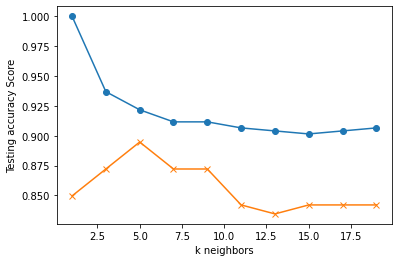

In [26]:
#K Nearest Neighbor - PART 1

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
#K Nearest Neighbor - PART 2

# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.895


In [29]:
#SVM

from sklearn.svm import SVC 

model = SVC(kernel='linear')

#train model
model.fit(X_train, y_train)

#test model
print('Test Acc: %.3f' % model.score(X_test, y_test))

# Calculate classification report
target_names = ["negative", "positive"]
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

Test Acc: 0.820
              precision    recall  f1-score   support

    negative       0.82      1.00      0.90       108
    positive       1.00      0.04      0.08        25

    accuracy                           0.82       133
   macro avg       0.91      0.52      0.49       133
weighted avg       0.85      0.82      0.75       133



In [30]:
#Gridsearch

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

# List the best parameters for this dataset
print(grid.best_params_)

# List the best score
print(grid.best_score_)

# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.850, total= 1.3min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.861, total=  43.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.861, total=  57.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.861, total=  22.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.848, total=  53.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.850, total= 1.1min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.861, total=  48.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.861, total= 1.0min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.861, total=  26.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 40.6min finished


{'C': 5, 'gamma': 0.0001}
0.8586075949367089
              precision    recall  f1-score   support

    negative       0.82      1.00      0.90       108
    positive       1.00      0.04      0.08        25

    accuracy                           0.82       133
   macro avg       0.91      0.52      0.49       133
weighted avg       0.85      0.82      0.75       133

